In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from collections import Counter
from mlxtend.plotting import plot_decision_regions

In [5]:
df = pd.read_csv("covid_with_dummies.csv")

In [6]:
df

,Unnamed: 0,death,age_new,USMER_2,SEX_M,PATIENT_TYPE_1,PNEUMONIA_1.0,PREGNANT_1.0,DIABETES_1.0,COPD_1.0,ASTHMA_1.0,INMSUPR_1.0,HIPERTENSION_1.0,OTHER_DISEASE_1.0,CARDIOVASCULAR_1.0,OBESITY_1.0,RENAL_CHRONIC_1.0,TOBACCO_1.0,classification_P
0,0,1,2,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1
1,1,1,2,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0
2,2,1,2,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,3,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,1,2,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021972,1048570,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1021973,1048571,0,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1021974,1048572,0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1021975,1048573,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
X_train, x_test, Y_train, y_test = train_test_split(df.iloc[:,2:], df.iloc[:,1],
                                                    test_size = 0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state=42)

In [10]:
def scores(y_train,y_val,x_train,x_val,model):
    predicted_train = model.predict(x_train)
    predicted_val = model.predict(x_val)
    precision = [round(precision_score(y_train,predicted_train)*100,2),round(precision_score(y_val,predicted_val)*100,2)]
    recall = [round(recall_score(y_train,predicted_train)*100,2),round(recall_score(y_val,predicted_val)*100,2)]
    f1 = [round(f1_score(y_train,predicted_train)*100,2),round(f1_score(y_val,predicted_val)*100,2)]
    return pd.DataFrame({"Dataset":["Train","Validation"],
                        "Precision": precision,
                        "Recall":recall,
                        "F1 Score":f1,
                        "Accuracy":[round(model.score(x_train, y_train) * 100, 2),round(model.score(x_val, y_val) * 100, 2)]})

In [12]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score

In [7]:
from sklearn.linear_model import LogisticRegression

In [13]:
logreg = LogisticRegression(solver='liblinear').fit(x_train, y_train)
df_logreg = scores(y_train,y_val,x_train,x_val,logreg)
df_logreg

,Dataset,Precision,Recall,F1 Score,Accuracy
0,Train,56.10,44.34,49.53,93.39
1,Validation,56.16,44.61,49.73,93.39


In [14]:
# Support Vector classifier
svc = LinearSVC(dual=False).fit(x_train, y_train)
df_svc = scores(y_train,y_val,x_train,x_val,svc)
df_svc

,Dataset,Precision,Recall,F1 Score,Accuracy
0,Train,59.55,30.36,40.21,93.39
1,Validation,59.36,30.11,39.95,93.37


In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Random forest classifier
random_forest = RandomForestClassifier().fit(x_train, y_train)
df_rf = scores(y_train,y_val,x_train,x_val,random_forest)
df_rf

,Dataset,Precision,Recall,F1 Score,Accuracy
0,Train,61.54,43.32,50.85,93.87
1,Validation,57.08,39.52,46.71,93.39


In [17]:
# Gaussian Naive Bayes
gaussian = GaussianNB().fit(x_train, y_train)  
df_gaussian = scores(y_train,y_val,x_train,x_val,gaussian)
df_gaussian

,Dataset,Precision,Recall,F1 Score,Accuracy
0,Train,35.52,79.95,49.18,87.91
1,Validation,35.73,79.91,49.38,88.00


In [18]:
from sklearn.linear_model import Perceptron

In [19]:
# Perceptron
perceptron = Perceptron().fit(x_train, y_train)
df_perceptron = scores(y_train,y_val,x_train,x_val,perceptron)
df_perceptron

,Dataset,Precision,Recall,F1 Score,Accuracy
0,Train,55.63,10.45,17.6,92.84
1,Validation,55.23,10.40,17.5,92.82


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
# Decision Tree
decision_tree = DecisionTreeClassifier().fit(x_train, y_train)
df_decision_tree = scores(y_train,y_val,x_train,x_val,decision_tree)
df_decision_tree

,Dataset,Precision,Recall,F1 Score,Accuracy
0,Train,61.91,42.23,50.21,93.87
1,Validation,57.05,38.77,46.17,93.38


In [22]:
# XGBoost
xgb = XGBClassifier().fit(x_train, y_train)
df_xgb = scores(y_train,y_val,x_train,x_val,xgb)
df_xgb

,Dataset,Precision,Recall,F1 Score,Accuracy
0,Train,59.65,40.19,48.03,93.63
1,Validation,58.41,39.16,46.89,93.50


In [23]:
dataframes = [df_logreg,df_svc,df_rf,df_gaussian,df_perceptron,df_decision_tree,df_xgb]
model = ["Logistic Regression","SVC","Random Forest","GaussianNB","Perceptron","Decision Tree","XGBoost"]
precisions = []
recalls = []
f1_scores= []
accuracies = []
for dataframe in dataframes:
    precisions.append(dataframe.iloc[1,1])
    recalls.append(dataframe.iloc[1,2])
    f1_scores.append(dataframe.iloc[1,3])
    accuracies.append(dataframe.iloc[1,4])
models = pd.DataFrame({"Model":model, "Precision":precisions,"Recall":recalls,"F1 Score":f1_scores,"Accuracy":accuracies})
models.set_index("Model").sort_values(by="F1 Score",ascending=False)

,Precision,Recall,F1 Score,Accuracy
Model,,,,
Logistic Regression,56.16,44.61,49.73,93.39
GaussianNB,35.73,79.91,49.38,88.00
XGBoost,58.41,39.16,46.89,93.50
Random Forest,57.08,39.52,46.71,93.39
Decision Tree,57.05,38.77,46.17,93.38
SVC,59.36,30.11,39.95,93.37
Perceptron,55.23,10.40,17.50,92.82


In [24]:
logreg_last = LogisticRegression().fit(X_train, Y_train)

In [25]:
from sklearn.model_selection import cross_val_score

scores_accuracy = cross_val_score(logreg_last, X_train, Y_train, cv=5, scoring = "accuracy")

print("Scores:", scores_accuracy)
print("Mean:", scores_accuracy.mean())
print("Standard Deviation:", scores_accuracy.std())

Scores: [0.93297333 0.93342548 0.9337496  0.93513173 0.93380464]
Mean: 0.9338169561714695
Standard Deviation: 0.0007208718960440878


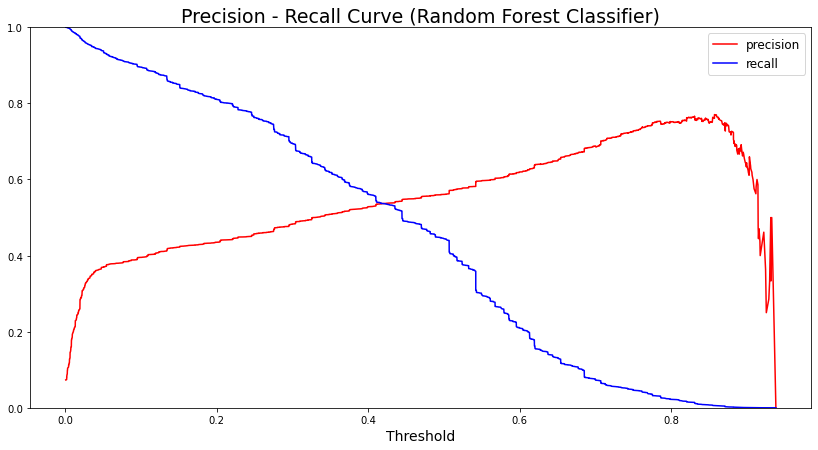

In [26]:
from sklearn.metrics import precision_recall_curve

y_scores = logreg_last.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision")
    plt.plot(threshold, recall[:-1], "b", label="recall")
    plt.title("Precision - Recall Curve (Random Forest Classifier)",fontsize=19)
    plt.xlabel("Threshold", fontsize=14)
    plt.legend(loc="upper right", fontsize=12)
    plt.ylim([0, 1])

plt.figure(figsize=[14,7])
plot_precision_and_recall(precision, recall, threshold)

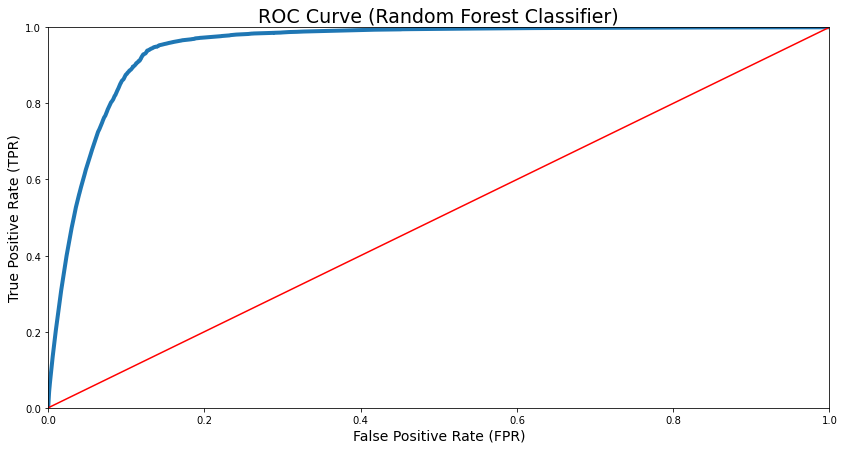

In [27]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=4, label=label)
    plt.plot([0, 1], [0, 1], 'r')
    plt.axis([0, 1, 0, 1])
    plt.title("ROC Curve (Random Forest Classifier)",fontsize=19)
    plt.xlabel('False Positive Rate (FPR)', fontsize=14)
    plt.ylabel('True Positive Rate (TPR)', fontsize=14)

plt.figure(figsize=[14,7])
plot_roc_curve(false_positive_rate, true_positive_rate)

In [28]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC Score:", r_a_score)

ROC-AUC Score: 0.9484018545161876


In [29]:
test_pred = logreg_last.predict(x_test.values)

C:\Users\MERVE\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [30]:
print("Precision:", round(precision_score(y_test,test_pred)*100,2))
print("Recall:", round(recall_score(y_test,test_pred)*100,2))
print("F1 Score:", round(f1_score(y_test,test_pred)*100,2))
print("Accuracy:", round(logreg_last.score(x_test, y_test) * 100, 2))

Precision: 55.93
Recall: 43.78
F1 Score: 49.11
Accuracy: 93.43


In [31]:
from sklearn.metrics import log_loss

print("Log-Loss: {:2.3f}".format(log_loss(y_test, logreg_last.predict_proba(x_test))))

Log-Loss: 0.137


In [32]:
from joblib import dump, load

In [33]:
dump(logreg_last,"logreg_without_sampling.pkl")

['logreg_without_sampling.pkl']